In [ ]:
# !pip install -q keras==3.11.1

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"

import keras
from keras import models
from keras import layers
from keras import activations
from keras import losses
from keras import metrics
from keras import ops

import torchvision
from torchvision import transforms

from torch.utils.data import DataLoader

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

from utils import CustomEvalDataset

plt.style.use("seaborn-v0_8-notebook")
plt.style.use("petroff10")
plt.set_loglevel("error")

print(f"Keras: {keras.__version__}")
print(f"Numpy: {np.__version__}")

Keras: 3.11.1
Numpy: 2.0.2


In [ ]:
verbose = 2

In [ ]:
train_data = torchvision.datasets.FashionMNIST(
    "./", train=True, transform=transforms.ToTensor(), download=True
)
test_data = torchvision.datasets.FashionMNIST(
    "./", train=True, transform=transforms.ToTensor(), download=True
)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 165kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.17MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.75MB/s]


In [ ]:
# What's the width and height of our images?
W, H = 28, 28  #
# How many values are in the input? We use this to help determine the size of subsequent layers
D = 28 * 28  # 28 * 28 images
# Hidden layer size
n = 256
# How many channels are in the input?
C = 1
# how many filters per convolutional layer
n_filters = 32
# How many classes are there?
classes = 10

In [ ]:
fc_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Flatten(),
        *[layers.Dense(n, activation="tanh") for _ in range(6)],
        layers.Dense(classes),
    ]
)

fc_callback_predict_test = CustomEvalDataset(datasets=test_loader)

fc_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

In [ ]:
fc_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 532,490 (2.03 MB)

 Trainable params: 532,490 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
fc_model.fit(
    train_loader, epochs=10, callbacks=[fc_callback_predict_test], verbose=verbose
)

Epoch 1/10
469/469 - 22s - 46ms/step - loss: 0.8263 - sparse_categorical_accuracy: 0.7283
Epoch 2/10
469/469 - 20s - 43ms/step - loss: 0.5198 - sparse_categorical_accuracy: 0.8171
Epoch 3/10
469/469 - 20s - 42ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8345
Epoch 4/10
469/469 - 20s - 43ms/step - loss: 0.4391 - sparse_categorical_accuracy: 0.8436
Epoch 5/10
469/469 - 22s - 47ms/step - loss: 0.4212 - sparse_categorical_accuracy: 0.8501
Epoch 6/10
469/469 - 19s - 42ms/step - loss: 0.4072 - sparse_categorical_accuracy: 0.8541
Epoch 7/10
469/469 - 20s - 42ms/step - loss: 0.3964 - sparse_categorical_accuracy: 0.8588
Epoch 8/10
469/469 - 20s - 43ms/step - loss: 0.3875 - sparse_categorical_accuracy: 0.8610
Epoch 9/10
469/469 - 19s - 41ms/step - loss: 0.3795 - sparse_categorical_accuracy: 0.8640
Epoch 10/10
469/469 - 20s - 42ms/step - loss: 0.3716 - sparse_categorical_accuracy: 0.8666


In [ ]:
W, H

(28, 28)

In [ ]:
cnn_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(
            4 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            4 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_model.fit(
    train_loader, callbacks=[cnn_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 31s - 66ms/step - loss: 0.7715 - sparse_categorical_accuracy: 0.7181
Epoch 2/10
469/469 - 31s - 66ms/step - loss: 0.4756 - sparse_categorical_accuracy: 0.8279
Epoch 3/10
469/469 - 31s - 66ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8505
Epoch 4/10
469/469 - 31s - 66ms/step - loss: 0.3863 - sparse_categorical_accuracy: 0.8630
Epoch 5/10
469/469 - 31s - 67ms/step - loss: 0.3637 - sparse_categorical_accuracy: 0.8701
Epoch 6/10
469/469 - 37s - 79ms/step - loss: 0.3456 - sparse_categorical_accuracy: 0.8773
Epoch 7/10
469/469 - 31s - 66ms/step - loss: 0.3298 - sparse_categorical_accuracy: 0.8826
Epoch 8/10
469/469 - 32s - 68ms/step - loss: 0.3159 - sparse_categorical_accuracy: 0.8872
Epoch 9/10
469/469 - 31s - 66ms/step - loss: 0.3061 - sparse_categorical_accuracy: 0.8893
Epoch 10/10
469/469 - 31s - 65ms/step - loss: 0.2949 - sparse_categorical_accuracy: 0.8938


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

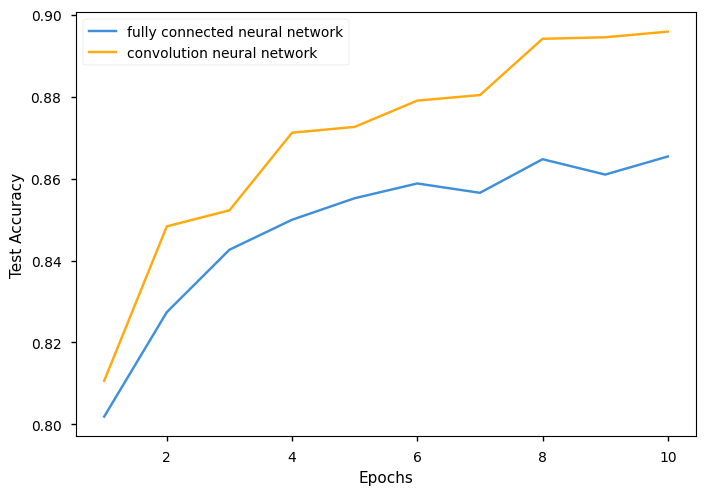

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "fully connected neural network": fc_callback_predict_test.list_metrics,
        "convolution neural network": cnn_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

<Axes: >

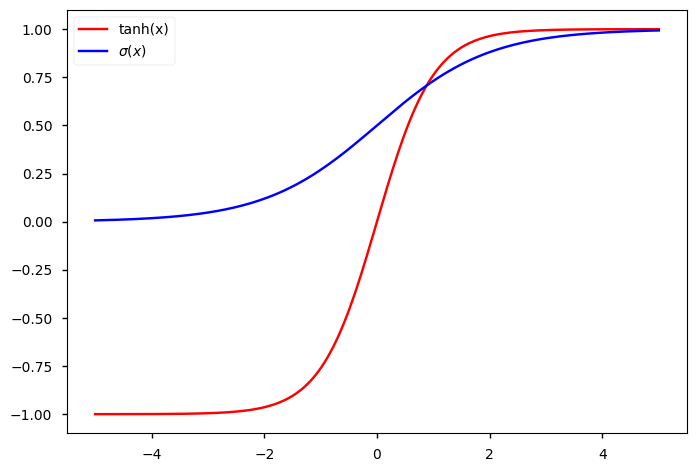

In [ ]:
def sigmoid(x):
    return np.exp(activation_input) / (np.exp(activation_input) + 1)


activation_input = np.linspace(-5, 5, num=200)
tanh_activation = np.tanh(activation_input)
sigmoid_activation = sigmoid(activation_input)

sns.lineplot(x=activation_input, y=tanh_activation, color="red", label="tanh(x)")
sns.lineplot(
    x=activation_input, y=sigmoid_activation, color="blue", label="$\sigma(x)$"
)

<Axes: >

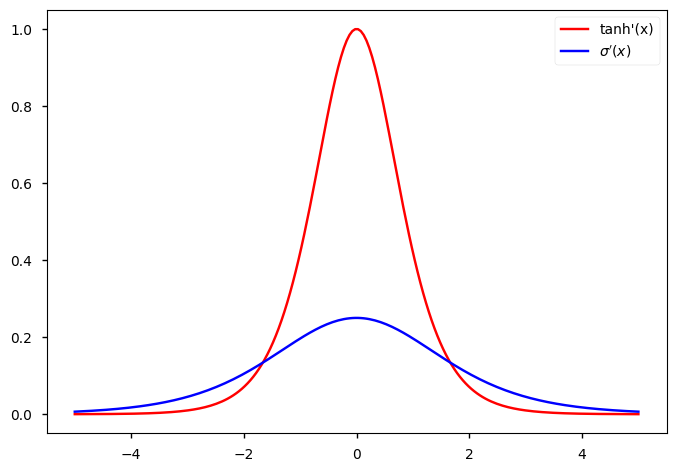

In [ ]:
def tanh_deriv(x):
    return 1.0 - np.tanh(x) ** 2


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


tanh_deriv = tanh_deriv(activation_input)
sigmoid_deriv = sigmoid_derivative(activation_input)

sns.lineplot(x=activation_input, y=tanh_deriv, color="red", label="tanh'(x)")
sns.lineplot(x=activation_input, y=sigmoid_deriv, color="blue", label="$\sigma'(x)$")

<Axes: >

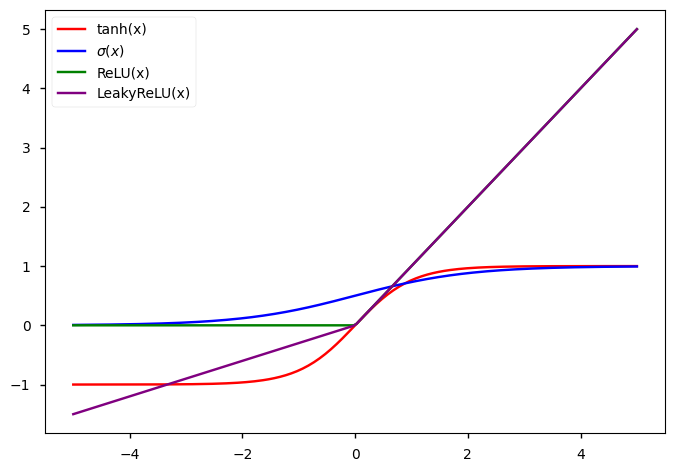

In [ ]:
activation_input = np.linspace(-5, 5, num=200)
relu_activation = np.maximum(0, activation_input)
leaky_relu_activation = np.maximum(0.3 * activation_input, activation_input)

sns.lineplot(x=activation_input, y=tanh_activation, color="red", label="tanh(x)")
sns.lineplot(
    x=activation_input, y=sigmoid_activation, color="blue", label="$\sigma(x)$"
)
sns.lineplot(x=activation_input, y=relu_activation, color="green", label="ReLU(x)")
sns.lineplot(
    x=activation_input, y=leaky_relu_activation, color="purple", label="LeakyReLU(x)"
)

<Axes: >

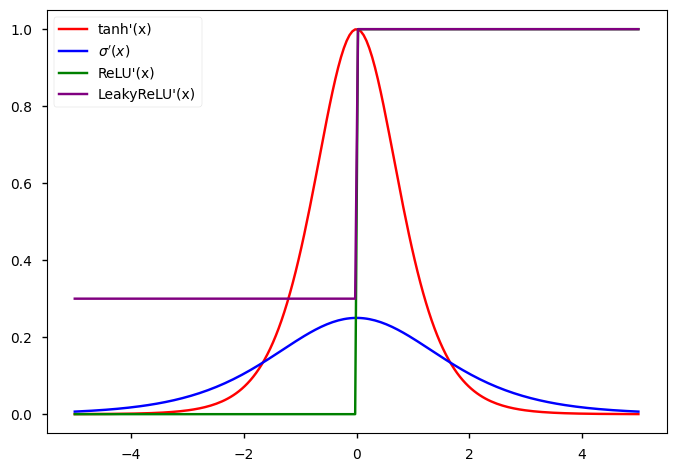

In [ ]:
relu_deriv = 1.0 * (activation_input > 0)
leaky_deriv = 1.0 * (activation_input > 0) + 0.3 * (activation_input <= 0)

sns.lineplot(x=activation_input, y=tanh_deriv, color="red", label="tanh'(x)")
sns.lineplot(x=activation_input, y=sigmoid_deriv, color="blue", label="$\sigma'(x)$")
sns.lineplot(x=activation_input, y=relu_deriv, color="green", label="ReLU'(x)")
sns.lineplot(x=activation_input, y=leaky_deriv, color="purple", label="LeakyReLU'(x)")

In [ ]:
leak_rate = 0.1  # How much I want the LeakyReLU to "leak" by. Anything in [0.01, 0.3] would have been fine.

In [ ]:
fc_relu_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Flatten(),
        *[
            layers.Dense(
                n,
                activation=lambda x: activations.leaky_relu(
                    x, negative_slope=leak_rate
                ),
            )
            for _ in range(6)
        ],
        layers.Dense(classes),
    ]
)

fc_relu_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

fc_relu_callback_predict_test = CustomEvalDataset(datasets=test_loader)
fc_relu_model.fit(
    train_loader, callbacks=[fc_relu_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 20s - 43ms/step - loss: 1.2393 - sparse_categorical_accuracy: 0.5814
Epoch 2/10
469/469 - 20s - 42ms/step - loss: 0.6552 - sparse_categorical_accuracy: 0.7647
Epoch 3/10
469/469 - 20s - 42ms/step - loss: 0.5451 - sparse_categorical_accuracy: 0.8056
Epoch 4/10
469/469 - 21s - 45ms/step - loss: 0.4967 - sparse_categorical_accuracy: 0.8245
Epoch 5/10
469/469 - 20s - 42ms/step - loss: 0.4636 - sparse_categorical_accuracy: 0.8354
Epoch 6/10
469/469 - 20s - 43ms/step - loss: 0.4399 - sparse_categorical_accuracy: 0.8437
Epoch 7/10
469/469 - 20s - 43ms/step - loss: 0.4243 - sparse_categorical_accuracy: 0.8489
Epoch 8/10
469/469 - 20s - 43ms/step - loss: 0.4082 - sparse_categorical_accuracy: 0.8549
Epoch 9/10
469/469 - 20s - 43ms/step - loss: 0.3958 - sparse_categorical_accuracy: 0.8593
Epoch 10/10
469/469 - 21s - 44ms/step - loss: 0.3851 - sparse_categorical_accuracy: 0.8639


In [ ]:
cnn_relu_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Conv2D(
            n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Conv2D(
            2 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(
            4 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Conv2D(
            4 * n_filters,
            3,
            padding="same",
            data_format="channels_first",
            activation=lambda x: activations.leaky_relu(x, negative_slope=leak_rate),
        ),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_relu_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_relu_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_relu_model.fit(
    train_loader, callbacks=[cnn_relu_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 31s - 66ms/step - loss: 1.2879 - sparse_categorical_accuracy: 0.5715
Epoch 2/10
469/469 - 31s - 66ms/step - loss: 0.5753 - sparse_categorical_accuracy: 0.7930
Epoch 3/10
469/469 - 31s - 66ms/step - loss: 0.4714 - sparse_categorical_accuracy: 0.8323
Epoch 4/10
469/469 - 31s - 65ms/step - loss: 0.4222 - sparse_categorical_accuracy: 0.8510
Epoch 5/10
469/469 - 32s - 68ms/step - loss: 0.3911 - sparse_categorical_accuracy: 0.8624
Epoch 6/10
469/469 - 31s - 66ms/step - loss: 0.3709 - sparse_categorical_accuracy: 0.8683
Epoch 7/10
469/469 - 31s - 66ms/step - loss: 0.3546 - sparse_categorical_accuracy: 0.8735
Epoch 8/10
469/469 - 31s - 65ms/step - loss: 0.3397 - sparse_categorical_accuracy: 0.8774
Epoch 9/10
469/469 - 30s - 65ms/step - loss: 0.3237 - sparse_categorical_accuracy: 0.8829
Epoch 10/10
469/469 - 30s - 65ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.8879


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

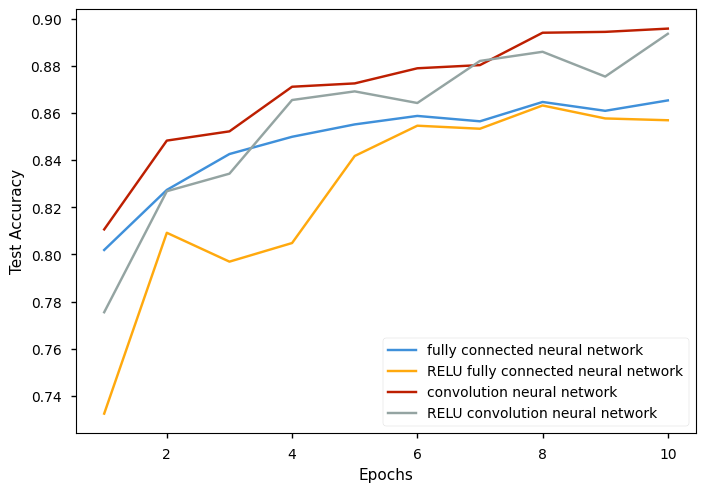

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "fully connected neural network": fc_callback_predict_test.list_metrics,
        "RELU fully connected neural network": fc_relu_callback_predict_test.list_metrics,
        "convolution neural network": cnn_callback_predict_test.list_metrics,
        "RELU convolution neural network": cnn_relu_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
def get_bn_layer(units, negative_slope):
    return layers.Pipeline(
        [
            layers.Dense(units),
            layers.BatchNormalization(),
            layers.LeakyReLU(negative_slope=negative_slope),
        ]
    )


fc_bn_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Flatten(),
        *[get_bn_layer(n, leak_rate) for _ in range(6)],
        layers.Dense(classes),
    ]
)

fc_bn_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

fc_bn_callback_predict_test = CustomEvalDataset(datasets=test_loader)
fc_bn_model.fit(
    train_loader, callbacks=[fc_bn_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 27s - 58ms/step - loss: 0.6277 - sparse_categorical_accuracy: 0.7879
Epoch 2/10
469/469 - 27s - 57ms/step - loss: 0.4124 - sparse_categorical_accuracy: 0.8535
Epoch 3/10
469/469 - 27s - 58ms/step - loss: 0.3622 - sparse_categorical_accuracy: 0.8704
Epoch 4/10
469/469 - 26s - 56ms/step - loss: 0.3299 - sparse_categorical_accuracy: 0.8827
Epoch 5/10
469/469 - 27s - 57ms/step - loss: 0.3049 - sparse_categorical_accuracy: 0.8913
Epoch 6/10
469/469 - 27s - 57ms/step - loss: 0.2855 - sparse_categorical_accuracy: 0.8976
Epoch 7/10
469/469 - 26s - 56ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9030
Epoch 8/10
469/469 - 27s - 57ms/step - loss: 0.2505 - sparse_categorical_accuracy: 0.9103
Epoch 9/10
469/469 - 26s - 56ms/step - loss: 0.2378 - sparse_categorical_accuracy: 0.9143
Epoch 10/10
469/469 - 27s - 57ms/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9198


In [ ]:
def get_cnn_bn_layer(n_filter, kernel_size, negative_slope):
    return layers.Pipeline(
        [
            layers.Conv2D(
                n_filter, kernel_size, padding="same", data_format="channels_first"
            ),
            layers.BatchNormalization(axis=1),
            layers.LeakyReLU(negative_slope=negative_slope),
        ]
    )


cnn_bn_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        get_cnn_bn_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_bn_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_bn_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.MaxPooling2D((2, 2), padding="same"),
        get_cnn_bn_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_bn_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_bn_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.MaxPooling2D((2, 2), padding="same"),
        get_cnn_bn_layer(4 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_bn_layer(4 * n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_bn_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_bn_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_bn_model.fit(
    train_loader, callbacks=[cnn_bn_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 41s - 87ms/step - loss: 0.5454 - sparse_categorical_accuracy: 0.8306
Epoch 2/10
469/469 - 42s - 88ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9024
Epoch 3/10
469/469 - 41s - 88ms/step - loss: 0.2063 - sparse_categorical_accuracy: 0.9259
Epoch 4/10
469/469 - 41s - 87ms/step - loss: 0.1690 - sparse_categorical_accuracy: 0.9398
Epoch 5/10
469/469 - 41s - 88ms/step - loss: 0.1381 - sparse_categorical_accuracy: 0.9517
Epoch 6/10
469/469 - 41s - 88ms/step - loss: 0.1109 - sparse_categorical_accuracy: 0.9629
Epoch 7/10
469/469 - 41s - 88ms/step - loss: 0.0909 - sparse_categorical_accuracy: 0.9719
Epoch 8/10
469/469 - 42s - 89ms/step - loss: 0.0733 - sparse_categorical_accuracy: 0.9793
Epoch 9/10
469/469 - 43s - 92ms/step - loss: 0.0585 - sparse_categorical_accuracy: 0.9847
Epoch 10/10
469/469 - 41s - 87ms/step - loss: 0.0473 - sparse_categorical_accuracy: 0.9898


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

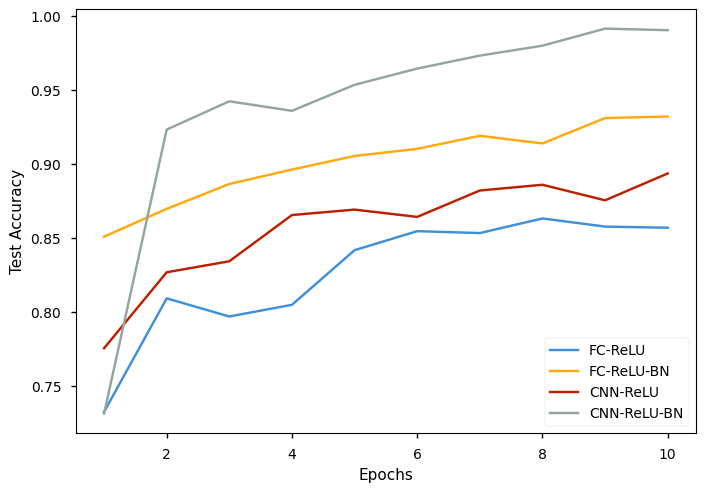

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "FC-ReLU": fc_relu_callback_predict_test.list_metrics,
        "FC-ReLU-BN": fc_bn_callback_predict_test.list_metrics,
        "CNN-ReLU": cnn_relu_callback_predict_test.list_metrics,
        "CNN-ReLU-BN": cnn_bn_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
def get_ln_layer(units, negative_slope):
    return layers.Pipeline(
        [
            layers.Dense(units),
            layers.LayerNormalization(),
            layers.LeakyReLU(negative_slope=negative_slope),
        ]
    )


fc_ln_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Flatten(),
        *[get_ln_layer(n, leak_rate) for _ in range(6)],
        layers.Dense(classes),
    ]
)

fc_ln_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

fc_ln_callback_predict_test = CustomEvalDataset(datasets=test_loader)
fc_ln_model.fit(
    train_loader, callbacks=[fc_ln_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 24s - 51ms/step - loss: 0.6057 - sparse_categorical_accuracy: 0.7871
Epoch 2/10
469/469 - 23s - 49ms/step - loss: 0.4234 - sparse_categorical_accuracy: 0.8466
Epoch 3/10
469/469 - 23s - 49ms/step - loss: 0.3765 - sparse_categorical_accuracy: 0.8634
Epoch 4/10
469/469 - 23s - 49ms/step - loss: 0.3478 - sparse_categorical_accuracy: 0.8724
Epoch 5/10
469/469 - 22s - 47ms/step - loss: 0.3257 - sparse_categorical_accuracy: 0.8796
Epoch 6/10
469/469 - 23s - 49ms/step - loss: 0.3094 - sparse_categorical_accuracy: 0.8862
Epoch 7/10
469/469 - 24s - 51ms/step - loss: 0.2941 - sparse_categorical_accuracy: 0.8917
Epoch 8/10
469/469 - 24s - 51ms/step - loss: 0.2809 - sparse_categorical_accuracy: 0.8968
Epoch 9/10
469/469 - 24s - 50ms/step - loss: 0.2702 - sparse_categorical_accuracy: 0.9000
Epoch 10/10
469/469 - 23s - 50ms/step - loss: 0.2607 - sparse_categorical_accuracy: 0.9039


In [ ]:
def get_cnn_ln_layer(n_filter, kernel_size, negative_slope):
    return layers.Pipeline(
        [
            layers.Conv2D(
                n_filter, kernel_size, padding="same", data_format="channels_first"
            ),
            layers.LayerNormalization(),
            layers.LeakyReLU(negative_slope=negative_slope),
        ]
    )


cnn_ln_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        get_cnn_ln_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_ln_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_ln_layer(n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.MaxPooling2D((2, 2), padding="same"),
        get_cnn_ln_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_ln_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_ln_layer(2 * n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.MaxPooling2D((2, 2), padding="same"),
        get_cnn_ln_layer(4 * n_filters, kernel_size=3, negative_slope=leak_rate),
        get_cnn_ln_layer(4 * n_filters, kernel_size=3, negative_slope=leak_rate),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_ln_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_ln_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_ln_model.fit(
    train_loader, callbacks=[cnn_ln_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 43s - 91ms/step - loss: 0.5516 - sparse_categorical_accuracy: 0.8324
Epoch 2/10
469/469 - 42s - 90ms/step - loss: 0.2626 - sparse_categorical_accuracy: 0.9068
Epoch 3/10
469/469 - 42s - 90ms/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9327
Epoch 4/10
469/469 - 42s - 90ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0.9529
Epoch 5/10
469/469 - 43s - 91ms/step - loss: 0.1011 - sparse_categorical_accuracy: 0.9698
Epoch 6/10
469/469 - 42s - 89ms/step - loss: 0.0757 - sparse_categorical_accuracy: 0.9801
Epoch 7/10
469/469 - 43s - 91ms/step - loss: 0.0544 - sparse_categorical_accuracy: 0.9887
Epoch 8/10
469/469 - 42s - 90ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9949
Epoch 9/10
469/469 - 42s - 90ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9978
Epoch 10/10
469/469 - 42s - 89ms/step - loss: 0.0204 - sparse_categorical_accuracy: 0.9992


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

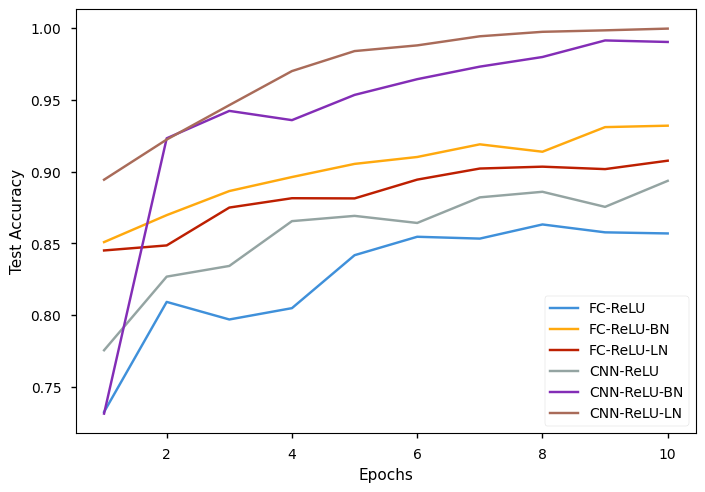

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "FC-ReLU": fc_relu_callback_predict_test.list_metrics,
        "FC-ReLU-BN": fc_bn_callback_predict_test.list_metrics,
        "FC-ReLU-LN": fc_ln_callback_predict_test.list_metrics,
        "CNN-ReLU": cnn_relu_callback_predict_test.list_metrics,
        "CNN-ReLU-BN": cnn_bn_callback_predict_test.list_metrics,
        "CNN-ReLU-LN": cnn_ln_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
class SkipFC(layers.Layer):
    def __init__(self, n_layers, in_size, out_size, leak_rate=0.1, **kwargs):
        """
        n_layers: how many hidden layers for this block of dense skip connections
        in_size: how many features are coming into this layer
        out_size: how many features should be used for the final layer of this block.
        leak_rate: the parameter for the LeakyReLU activation function.
        """
        super().__init__(**kwargs)

        self.n_layers = n_layers
        self.in_size = in_size
        self.out_size = out_size
        self.leak_rate = leak_rate

        # The final layer will be treated differently, so lets grab its index
        l = n_layers - 1

        # Create the dense and batch normalization layers
        # The final layer uses concatenated input (in_size * l) -> out_size
        # All other layers use in_size -> in_size
        self.dense_layers = []
        self.bn_layers = []

        for i in range(n_layers):
            if i == l:  # Last layer
                dense = layers.Dense(out_size)
                bn = layers.BatchNormalization()
            else:  # Hidden layers
                dense = layers.Dense(in_size)
                bn = layers.BatchNormalization()

            self.dense_layers.append(dense)
            self.bn_layers.append(bn)

        # LeakyReLU activation
        self.activation = layers.LeakyReLU(negative_slope=leak_rate)

    def call(self, x, training=None):
        # Store activations from every layer (except the last one)
        activations = []

        # Process all layers except the last one
        for i in range(self.n_layers - 1):
            x = self.dense_layers[i](x)
            x = self.bn_layers[i](x, training=training)
            x = self.activation(x)
            activations.append(x)

        # Concatenate all activations for the final layer input
        x = ops.concatenate(activations, axis=1)

        # Apply the final layer
        x = self.dense_layers[-1](x)
        x = self.bn_layers[-1](x, training=training)
        x = self.activation(x)

        return x

In [ ]:
fc_skip_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Flatten(),
        SkipFC(2, D, n),
        SkipFC(2, n, n),
        SkipFC(2, n, n),
        layers.Dense(classes),
    ]
)

fc_skip_callback_predict_test = CustomEvalDataset(datasets=test_loader)

fc_skip_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

fc_skip_model.fit(
    train_loader, callbacks=[fc_skip_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 27s - 58ms/step - loss: 0.5868 - sparse_categorical_accuracy: 0.8037
Epoch 2/10
469/469 - 27s - 57ms/step - loss: 0.3792 - sparse_categorical_accuracy: 0.8661
Epoch 3/10
469/469 - 26s - 56ms/step - loss: 0.3273 - sparse_categorical_accuracy: 0.8831
Epoch 4/10
469/469 - 26s - 55ms/step - loss: 0.2919 - sparse_categorical_accuracy: 0.8959
Epoch 5/10
469/469 - 26s - 56ms/step - loss: 0.2666 - sparse_categorical_accuracy: 0.9053
Epoch 6/10
469/469 - 26s - 56ms/step - loss: 0.2442 - sparse_categorical_accuracy: 0.9125
Epoch 7/10
469/469 - 27s - 57ms/step - loss: 0.2239 - sparse_categorical_accuracy: 0.9211
Epoch 8/10
469/469 - 26s - 56ms/step - loss: 0.2076 - sparse_categorical_accuracy: 0.9263
Epoch 9/10
469/469 - 26s - 55ms/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9333
Epoch 10/10
469/469 - 26s - 55ms/step - loss: 0.1765 - sparse_categorical_accuracy: 0.9373


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

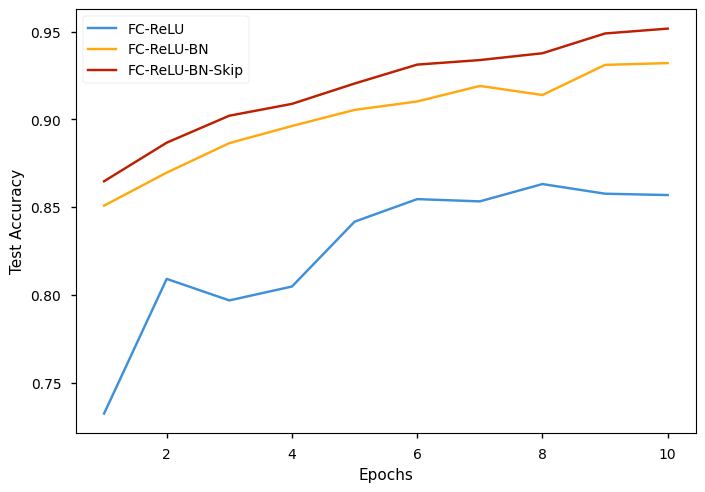

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "FC-ReLU": fc_relu_callback_predict_test.list_metrics,
        "FC-ReLU-BN": fc_bn_callback_predict_test.list_metrics,
        "FC-ReLU-BN-Skip": fc_skip_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
class SkipConv2d(layers.Layer):
    def __init__(
        self,
        n_layers,
        in_channels,
        out_channels,
        kernel_size=3,
        padding="same",
        data_format="channels_first",
        leak_rate=0.1,
        **kwargs,
    ):
        super().__init__(**kwargs)

        self.n_layers = n_layers
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.leak_rate = leak_rate

        # The last convolution will have a different number of inputs and output channels
        l = n_layers - 1

        # Create the layers
        self.conv_layers = []
        self.bn_layers = []

        axis_batchnorm = -1
        if data_format == "channels_first":
            axis_batchnorm = 1

        for i in range(n_layers):
            if i == l:  # Last layer
                conv = layers.Conv2D(
                    filters=out_channels,
                    kernel_size=kernel_size,
                    padding=padding,
                    data_format=data_format,
                    name=f"conv_{i}",
                )
                bn = layers.BatchNormalization(axis=axis_batchnorm, name=f"bn_{i}")
            else:  # Intermediate layers
                conv = layers.Conv2D(
                    filters=in_channels,
                    kernel_size=kernel_size,
                    padding=padding,
                    data_format=data_format,
                    name=f"conv_{i}",
                )
                bn = layers.BatchNormalization(axis=axis_batchnorm, name=f"bn_{i}")

            self.conv_layers.append(conv)
            self.bn_layers.append(bn)

        self.activation = layers.LeakyReLU(negative_slope=leak_rate)

    def call(self, x):
        activations = []

        # Process all layers except the last one
        for i in range(self.n_layers - 1):
            x = self.conv_layers[i](x)
            x = self.bn_layers[i](x)
            x = self.activation(x)
            activations.append(x)

        # Concatenate all activations along the channel dimension (axis=3 for channels_last)
        # In Keras, the default data format is channels_last: (batch, height, width, channels)
        x = ops.concatenate(activations, axis=-1)

        # Apply the final layer
        x = self.conv_layers[-1](x)
        x = self.bn_layers[-1](x)
        x = self.activation(x)

        return x

In [ ]:
cnn_skip_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        layers.Conv2D(n_filters, 3, padding="same", data_format="channels_first"),
        SkipConv2d(3, n_filters, 2 * n_filters),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.LeakyReLU(negative_slope=leak_rate),
        SkipConv2d(3, 2 * n_filters, 4 * n_filters),
        layers.MaxPooling2D((2, 2), padding="same"),
        SkipConv2d(2, 4 * n_filters, 4 * n_filters),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_skip_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_skip_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_skip_model.fit(
    train_loader, callbacks=[cnn_skip_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 95s - 202ms/step - loss: 1.0083 - sparse_categorical_accuracy: 0.8129
Epoch 2/10
469/469 - 95s - 202ms/step - loss: 0.2946 - sparse_categorical_accuracy: 0.8935
Epoch 3/10
469/469 - 95s - 202ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9158
Epoch 4/10
469/469 - 95s - 202ms/step - loss: 0.1818 - sparse_categorical_accuracy: 0.9337
Epoch 5/10
469/469 - 94s - 201ms/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9477
Epoch 6/10
469/469 - 94s - 201ms/step - loss: 0.1135 - sparse_categorical_accuracy: 0.9605
Epoch 7/10
469/469 - 95s - 202ms/step - loss: 0.0859 - sparse_categorical_accuracy: 0.9705
Epoch 8/10
469/469 - 95s - 202ms/step - loss: 0.0569 - sparse_categorical_accuracy: 0.9832
Epoch 9/10
469/469 - 94s - 201ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9901
Epoch 10/10
469/469 - 94s - 200ms/step - loss: 0.0241 - sparse_categorical_accuracy: 0.9959


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

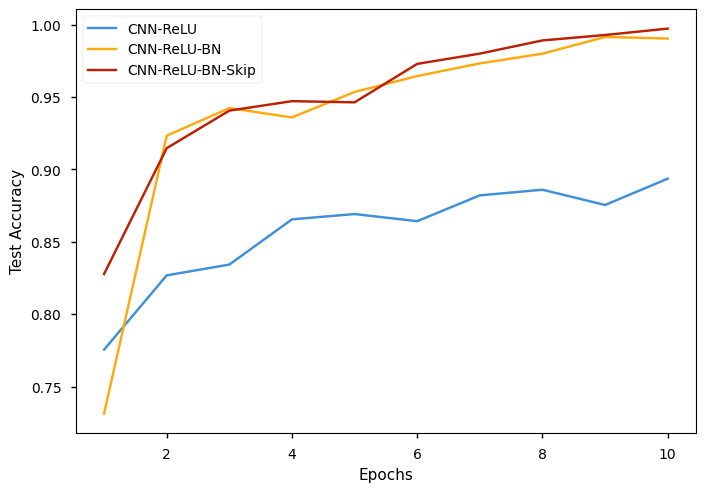

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "CNN-ReLU": cnn_relu_callback_predict_test.list_metrics,
        "CNN-ReLU-BN": cnn_bn_callback_predict_test.list_metrics,
        "CNN-ReLU-BN-Skip": cnn_skip_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
def get_info_share_block(n_filters):
    return layers.Pipeline(
        [
            layers.Conv2D(n_filters, 1, padding="valid", data_format="channels_first"),
            layers.BatchNormalization(axis=1),
            layers.LeakyReLU(negative_slope=leak_rate),
        ]
    )


def get_cnn_layer(out_filters, kernel_size=3):
    return layers.Pipeline(
        [
            layers.Conv2D(
                out_filters, kernel_size, padding="same", data_format="channels_first"
            ),
            layers.BatchNormalization(axis=1),
            layers.LeakyReLU(negative_slope=leak_rate),
        ]
    )

In [ ]:
cnn_1x1_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        get_cnn_layer(n_filters),
        get_cnn_layer(n_filters),
        get_info_share_block(n_filters),
        get_cnn_layer(n_filters),
        layers.MaxPooling2D((2, 2)),
        get_cnn_layer(2 * n_filters),
        get_cnn_layer(2 * n_filters),
        get_info_share_block(2 * n_filters),
        get_cnn_layer(2 * n_filters),
        layers.MaxPooling2D((2, 2)),
        get_cnn_layer(4 * n_filters),
        get_cnn_layer(4 * n_filters),
        get_info_share_block(4 * n_filters),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_1x1_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_1x1_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_1x1_model.fit(
    train_loader, callbacks=[cnn_1x1_callback_predict_test], epochs=10, verbose=verbose
)
# del cnn_1x1_model

Epoch 1/10
469/469 - 48s - 102ms/step - loss: 0.5267 - sparse_categorical_accuracy: 0.8288
Epoch 2/10
469/469 - 47s - 100ms/step - loss: 0.2710 - sparse_categorical_accuracy: 0.9022
Epoch 3/10
469/469 - 47s - 100ms/step - loss: 0.2067 - sparse_categorical_accuracy: 0.9251
Epoch 4/10
469/469 - 47s - 99ms/step - loss: 0.1586 - sparse_categorical_accuracy: 0.9434
Epoch 5/10
469/469 - 47s - 99ms/step - loss: 0.1248 - sparse_categorical_accuracy: 0.9572
Epoch 6/10
469/469 - 46s - 99ms/step - loss: 0.0988 - sparse_categorical_accuracy: 0.9680
Epoch 7/10
469/469 - 47s - 100ms/step - loss: 0.0744 - sparse_categorical_accuracy: 0.9793
Epoch 8/10
469/469 - 46s - 99ms/step - loss: 0.0558 - sparse_categorical_accuracy: 0.9869
Epoch 9/10
469/469 - 47s - 100ms/step - loss: 0.0421 - sparse_categorical_accuracy: 0.9923
Epoch 10/10
469/469 - 47s - 99ms/step - loss: 0.0321 - sparse_categorical_accuracy: 0.9958


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

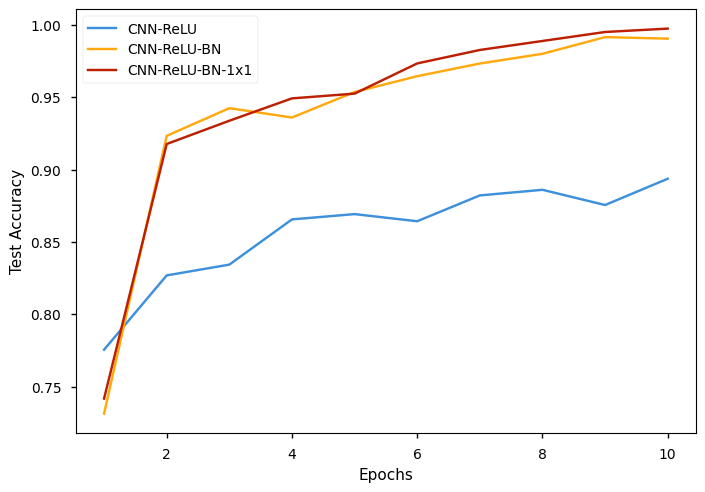

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "CNN-ReLU": cnn_relu_callback_predict_test.list_metrics,
        "CNN-ReLU-BN": cnn_bn_callback_predict_test.list_metrics,
        "CNN-ReLU-BN-1x1": cnn_1x1_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")

In [ ]:
class ResidualBlockE(layers.Layer):
    def __init__(
        self,
        channels,
        kernel_size=3,
        leak_rate=0.1,
        data_format="channels_first",
        **kwargs,
    ):
        """
        channels: how many channels are in the input/output to this layer
        kernel_size: how large of a filter should we use
        leak_rate: parameter for the LeakyReLU activation function
        """
        super().__init__(**kwargs)
        self.channels = channels
        self.kernel_size = kernel_size
        self.leak_rate = leak_rate
        self.data_format = data_format

        axis_batch = 1 if data_format == "channels_first" else -1

        self.F = layers.Pipeline(
            [
                layers.Conv2D(
                    channels, kernel_size, padding="same", data_format=data_format
                ),
                layers.BatchNormalization(axis=axis_batch),
                layers.LeakyReLU(leak_rate),
                layers.Conv2D(
                    channels, kernel_size, padding="same", data_format=data_format
                ),
                layers.BatchNormalization(axis=axis_batch),
                layers.LeakyReLU(leak_rate),
            ]
        )

    def call(self, x):
        # F() has all the work for the long path, we just add it to the input
        return x + self.F(x)

In [ ]:
class ResidualBottleNeck(layers.Layer):
    def __init__(
        self,
        in_channels,
        out_channels,
        kernel_size=3,
        leak_rate=0.1,
        data_format="channels_first",
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.leak_rate = leak_rate
        self.data_format = data_format

        # The bottleneck should be smaller, so output/4 or input. You could also try changing max to min, its not a major issue.
        bottleneck = max(out_channels // 4, in_channels)
        axis_batch = 1 if data_format == "channels_first" else -1

        # Define the three sets of BN and convolution layers we need.
        # Notice that for the 1x1 convs we use padding=0, because 1x1 will not change shape!

        self.F = layers.Pipeline(
            [
                # Compress down
                layers.BatchNormalization(axis=axis_batch),
                layers.LeakyReLU(negative_slope=leak_rate),
                layers.Conv2D(bottleneck, 1, padding="valid", data_format=data_format),
                # Normal layer doing a full conv
                layers.BatchNormalization(axis=axis_batch),
                layers.LeakyReLU(negative_slope=leak_rate),
                layers.Conv2D(
                    bottleneck, kernel_size, padding="same", data_format=data_format
                ),
                # Expand back up
                layers.BatchNormalization(axis=axis_batch),
                layers.LeakyReLU(negative_slope=leak_rate),
                layers.Conv2D(
                    out_channels, 1, padding="valid", data_format=data_format
                ),
            ]
        )

        # By default, our shortcut will be the identity function - which simply returns the input as the output
        self.shortcut = layers.Identity()
        if in_channels != out_channels:
            # If we need to change the shape, then lets turn the shortcut into a small layer with 1x1 conv and BN
            self.shortcut = layers.Pipeline(
                [
                    layers.Conv2D(
                        out_channels, 1, padding="valid", data_format=data_format
                    ),
                    layers.BatchNormalization(axis=axis_batch),
                ]
            )

    def call(self, x):
        return self.shortcut(x) + self.F(x)

In [ ]:
layers.Identity()

<Identity name=identity, built=True>

In [ ]:
cnn_res_model = models.Sequential(
    [
        layers.Input(shape=(1, W, H)),
        ResidualBottleNeck(1, n_filters),
        layers.LeakyReLU(leak_rate),
        ResidualBlockE(n_filters),
        layers.LeakyReLU(leak_rate),
        layers.MaxPooling2D((2, 2), data_format="channels_first"),
        ResidualBottleNeck(n_filters, 2 * n_filters),
        layers.LeakyReLU(leak_rate),
        ResidualBlockE(2 * n_filters),
        layers.LeakyReLU(leak_rate),
        layers.MaxPooling2D((2, 2), data_format="channels_first"),
        ResidualBottleNeck(2 * n_filters, 4 * n_filters),
        layers.LeakyReLU(leak_rate),
        ResidualBlockE(4 * n_filters),
        layers.LeakyReLU(leak_rate),
        layers.Flatten(),
        layers.Dense(classes),
    ]
)

cnn_res_model.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_res_callback_predict_test = CustomEvalDataset(datasets=test_loader)
cnn_res_model.fit(
    train_loader, callbacks=[cnn_res_callback_predict_test], epochs=10, verbose=verbose
)

Epoch 1/10
469/469 - 52s - 111ms/step - loss: 0.6347 - sparse_categorical_accuracy: 0.8134
Epoch 2/10
469/469 - 52s - 111ms/step - loss: 0.3076 - sparse_categorical_accuracy: 0.8901
Epoch 3/10
469/469 - 51s - 109ms/step - loss: 0.2442 - sparse_categorical_accuracy: 0.9122
Epoch 4/10
469/469 - 51s - 110ms/step - loss: 0.2079 - sparse_categorical_accuracy: 0.9244
Epoch 5/10
469/469 - 52s - 112ms/step - loss: 0.1752 - sparse_categorical_accuracy: 0.9381
Epoch 6/10
469/469 - 52s - 111ms/step - loss: 0.1534 - sparse_categorical_accuracy: 0.9464
Epoch 7/10
469/469 - 51s - 109ms/step - loss: 0.1302 - sparse_categorical_accuracy: 0.9557
Epoch 8/10
469/469 - 52s - 111ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9627
Epoch 9/10
469/469 - 52s - 110ms/step - loss: 0.0938 - sparse_categorical_accuracy: 0.9712
Epoch 10/10
469/469 - 52s - 110ms/step - loss: 0.0783 - sparse_categorical_accuracy: 0.9776


<Axes: xlabel='Epochs', ylabel='Test Accuracy'>

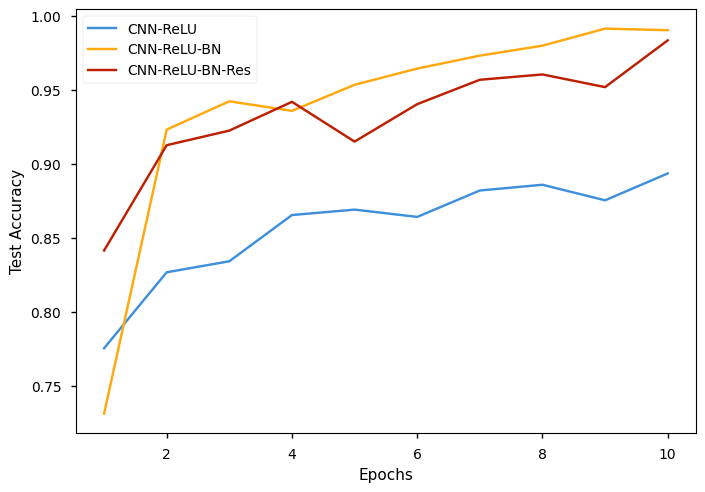

In [ ]:
pd.DataFrame(
    {
        "Epochs": np.arange(1, 11, 1),
        "CNN-ReLU": cnn_relu_callback_predict_test.list_metrics,
        "CNN-ReLU-BN": cnn_bn_callback_predict_test.list_metrics,
        "CNN-ReLU-BN-Res": cnn_res_callback_predict_test.list_metrics,
    }
).set_index("Epochs").plot(ylabel="Test Accuracy")